# syHEP code for $h \to \chi\chi$ (s-channel) amplitude and total cross-section

In [8]:
#!python -m pip install -r ../requirements.txt

In [9]:
import sympy as sy

In [10]:
import sys,os
sys.path.append('..')
import syHEP.src.syhep as hep

from syHEP.src.syhep.extras import Amplitude_schannel, decay_Gamma

from app.modules.functions import find_symbol


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Steps for SYMPY calculation

---

## SM Analogous Process: $ H(q) \to W^-_0(k_1)+W^+_0(k_2)$

### Symbols, vectors and constants


In [12]:
## latex symbols doesn't need "$" 
theta, phi = sy.symbols('theta phi', real=True, positive=True)

s, t, u, p, s0, t0, u0, Gamma = sy.symbols('s t u p s_0 t_0 u_0 Gamma', real=True, positive=True)

Mmed, mf= sy.symbols(r'M_{med} m_f', real=True, positive=True)

## Extra terms

Etot, E1, E2, m1, m2 = sy.symbols(r'E_tot E_1 E_2 m_1 m_2', real=True, positive=True)

# Electroweak constants
#cv, ca, gz, gw, thetaw, gz_theta, gw_theta = symbols(r'c_v c_a g_Z g_W theta_W g_Z_theta g_W_theta', real=True, positive=True )


#E1, E2, E3, E4, theta2, theta3, Mi, Mf, gx = symbols(r'E_1  E_2 E_3 E_4 theta_2 theta_3 M_i M_f g_{\chi}', real=True, positive=True)


---
# Decay width Z -> WW

In [13]:
## Por conservação de momento de uma partícula decaindo em repouso, teremos que:
# k = (M, 0, 0, 0)
# M = E1 + E2
# E2 = M - E1

# Initial particle at rest frame
k = sy.Matrix([0,             Mmed,  0,      0])


# Final states
p3 = sy.Matrix([sy.sqrt(s)/2, mf,  theta,  0])
p4 = sy.Matrix([sy.sqrt(s)/2, mf, -theta,  sy.pi])


In [16]:
tems_func = decay_Gamma('scalar', 'phibar', p3, 'phi', p4) 

# Display no null the terms
for expr in tems_func:
    if expr != 0:
        display(expr)

2*I*g_s\psi

2*I*g_s\psi

2*I*g_s\psi

2*I*g_s\psi

In [18]:
def get_amp_squared_decay(terms: list):
    

    beta, xi, lamb = sy.symbols(r'beta xi lambda', real=True, positive=True)
    

    sum_terms = 0
    for T in terms:
        T = T.subs(sy.sqrt(- sy.sqrt(s) + 2*mf), beta)
        T = T.subs(sy.sqrt(s - 4*mf**2), lamb)
        sum_terms += T  * sy.conjugate(T)

    # Summing over outgoing and averaging over incoming helicities we thus get for the average of squared amplitudes
    squared_result = sum_terms #/ 4 # Averaging over the incoming helicities

    
    # Reverse substitutions
    squared_result = squared_result.subs(beta, sy.sqrt(- sy.sqrt(s) + 2*mf))
    squared_result = squared_result.subs(lamb, sy.sqrt(s - 4*mf**2))

    squared_result = sy.nsimplify(sy.expand(squared_result))
    # last simplification
    #amp_squared = simplify(squared_result)
    #amp_squared = collect(collect(amp_squared, s), mf)

    return sy.simplify(squared_result)

In [26]:
def get_complete_gamma_decay(amp_squared):
    # The kinematic pre-factor for the decay is  
    prefact_decay = (1/(16*sy.pi*Mmed))*sy.sqrt(1 - (mf + mf)**2/Mmed**2)*sy.sqrt(1 - (mf - mf)**2/Mmed**2)
    # Portanto, teremos que 

    Gamma_expr = prefact_decay  * amp_squared #/4#/ (12) # averagin over the initial states

    return Gamma_expr

In [20]:
MW, v, MH, MZ, lamb, GF, gw, e, thetaw = sy.symbols(r'M_W \nu M_H M_Z \lambda G_F g_W e theta_W', real=True, positive=True)

---

## Scalar DM

In [ ]:
tems_func

In [ ]:
amp_squared = get_amp_squared_decay(tems_func)
scalar_decay_S = get_complete_gamma_decay(amp_squared)
scalar_decay_S = scscalar_decay_Salar_decay_s.subs(theta, sy.pi).subs(s, Mmed**2)
scalar_decay_S

g_s\psi**2*sqrt(1 - 4*m_f**2/M_{med}**2)/(pi*M_{med})

## Fermion DM

In [32]:
# Get terms
tems_func = decay_Gamma('scalar', 'ubar', p3, 'v', p4) 

# get amp squared
amp_squared = get_amp_squared_decay(tems_func)
scalar_decay_F = get_complete_gamma_decay(amp_squared)
scalar_decay_F = scalar_decay_F.subs(theta, sy.pi).subs(s, Mmed**2)
sy.simplify(scalar_decay_F)

g_s\psi**2*(M_{med}**2 - 4*m_f**2)**(3/2)/(16*pi*M_{med}**2)

## Vector DM

In [34]:
# Get terms
tems_func = decay_Gamma('scalar', 'polbar', -p3, 'pol', -p4) 

# get amp squared
amp_squared = get_amp_squared_decay(tems_func)
scalar_decay_V = get_complete_gamma_decay(amp_squared)
scalar_decay_V = scalar_decay_V.subs(theta, sy.pi).subs(s, Mmed**2)
sy.simplify(scalar_decay_V)

g_s\psi**2*sqrt(M_{med}**2 - 4*m_f**2)*(M_{med}**4 - 8*M_{med}**2*m_f**2 + 16*m_f**4)/(64*pi*M_{med}**2*m_f**4)

In [ ]:
## que é a mesma expressão que tinhamos pro decaimento do fermion e também de outros processos, o que significa que a lógica do código esta correta. Basta avaliar mais cuidadosamente a cinemática definida nos vetores iniciais 



In [20]:
# Obtendo o código fonte da função
codigo_fonte = {}


#codigo_fonte['SM'] = sigma_SM_func
codigo_fonte['DM'] = Gamma_func
#codigo_fonte['DM_noqq'] = sigma_DM_noqq_func

import inspect
for name, func in codigo_fonte.items():

    print(inspect.getsource(func))

def _lambdifygenerated(s, M_med, m_f, Dummy_22):
    return (1/192)*Dummy_22**2*(M_med**2 - 4*m_f**2)**(3/2)/(pi*m_f**2)



In [121]:
#Gamma_vec = nsimplify(expand(Gamma_vec))

## Some functions to give a pretier expression
Gamma_vec =  together((nsimplify(expand(Gamma_vec))))

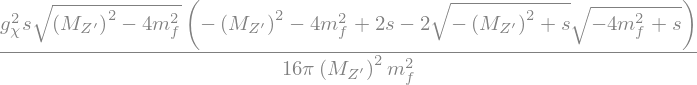

In [128]:
together(collect(expand(Gamma_vec), s )).subs(xi, sqrt(MZp **2 - 4))

###  